   # 1. Importacion de librerías y carga datos

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats as st


data = pd.read_csv("games.csv") #leyendo base de datos

data.sample(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
7896,Nobunaga no Yabou: Souzou,PS3,2013.0,Strategy,0.00,0.00,0.19,0.00,NaN,NaN,NaN
1842,NBA Jam Tournament Edition,GEN,1994.0,Sports,0.95,0.14,0.00,0.03,NaN,NaN,NaN
2049,Ninja Gaiden II,X360,2008.0,Action,0.65,0.22,0.05,0.10,81.0,8,M
8436,Sega Superstars,PS2,2004.0,Misc,0.08,0.06,0.00,0.02,72.0,7,T
6464,Phantasy Star Universe: Ambition of the Illuminus,PS2,2007.0,Role-Playing,0.10,0.08,0.05,0.03,NaN,8.4,T


# 2. Preparando datos

Reemplazando los nombres de las columnas

In [2]:
new_col_names = []
for name in data.columns:
    new_col_names.append(name.lower()) #convirtiendo a minúsculas nombres de columnas
data.columns = new_col_names
print(data.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


In [3]:
data[data["name"]=="Grand Theft Auto V"]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M
165,Grand Theft Auto V,XOne,2014.0,Action,2.81,2.19,0.00,0.47,97.0,7.9,M
1730,Grand Theft Auto V,PC,2015.0,Action,0.39,0.69,0.00,0.09,96.0,7.9,M


Con esta pequeña muestra, se puede comprender que un mismo juego se lanzó en años diferentes y en diferentes plataformas, y las venta corresponden a cada año de lanzamiento.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Se revisará duplicados y valores nulos.
Se observa que el año tiene un tipo de dato incorrecto, debería ser entero.
La columna genre debería ser tipo string.
Además hay muchos valores nulos en las columnas critic_store, user_score y rating.
Esto se puede deber a que no hubo muchas ventas y destinaron tiempo para su calificación, se trate de data muy antigua o simplemente a un mal llenado de información. 

In [5]:
data.duplicated().sum()

0

No hay filas duplicadas

In [6]:
data[data["genre"].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [7]:
data["year_of_release"].isnull().sum()

269

In [8]:
data[data["year_of_release"].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [9]:

# Reemplazando valores ausentes con "0"


data["year_of_release"] = data["year_of_release"].fillna(0)


data["year_of_release"]= data["year_of_release"].astype(int)



data["genre"] = data["genre"].fillna("no identificado")  # Reemplazando valores ausentes con "no identificado"


data["name"] = data["name"].fillna("no identificado") # Reemplazando valores ausentes con "no identificado"

Se decide no eliminar las filas con valores ausentes en "name" y "genre", ya que más adelante se analizará cuota de mercado por plataforma y región, y esos valores ausentes no afectarán el análisis por el contrario si se borra las filas podría afectar los resultados. Sin embargo se está identificándolos. Además se reemplaza los valores ausentes de año por 0, y se convierte en entero, más adelante se decidirá si aun se mantiene o elimina.

In [10]:
data[data["user_score"].isna()]


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [11]:
print(data["critic_score"].min())
print(data["critic_score"].max())

13.0
98.0


Se realiza el cálculo de ventas totales.

In [12]:
data["ventas_totales"] = data.loc[:,"na_sales":"other_sales"].sum(axis=1)
display(data)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,ventas_totales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


# 3. Analizando Datos

- Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?

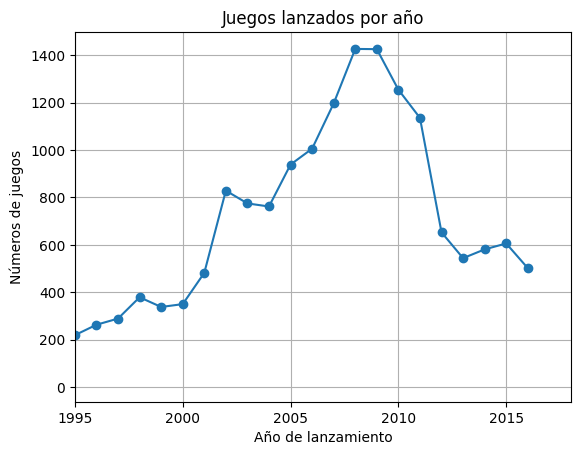

In [13]:
juegos_año = data.groupby(by="year_of_release")["name"].count() #Agrupando por año 
juegos_año.plot(xlabel="Año de lanzamiento", ylabel="Números de juegos",title='Juegos lanzados por año', style='o-')
plt.xlim(1995, 2018)
plt.grid(True)
plt.show()

El número de juegos lanzados desde 1995 hasta alrededor del 2008 fue aumentando,y empezó a decrecer alrededor del 2009 hasta el 2016. La cantidad de juegos por año fue entre 200 a más de 1400 juegos.

- Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

In [14]:
ventas_plataforma = data.groupby(by="platform")["ventas_totales"].sum().reset_index()  # Agrupando por plataforma
ventas_plataforma.sample(15)

,platform,ventas_totales
3,DC,15.95
8,GEN,30.77
12,NG,1.44
0,2600,96.98
21,SAT,33.59
28,X360,971.42
24,TG16,0.16
27,WiiU,82.19
30,XOne,159.32
25,WS,1.42


Utilizaremos un diagrama de pareto para elegir las plataformas con mayores ventas y más representativas.
Se crea una función diagrama_pareto

,index,platform,ventas_totales
0,16,PS2,1255.77
1,28,X360,971.42
2,17,PS3,939.65
3,26,Wii,907.51
4,4,DS,806.12
5,15,PS,730.86
6,6,GBA,317.85
7,18,PS4,314.14
8,19,PSP,294.05
9,13,PC,259.52


C:\Users\LUCIA\AppData\Local\Temp\ipykernel_2052\3874426141.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(data[categoria], rotation=45)


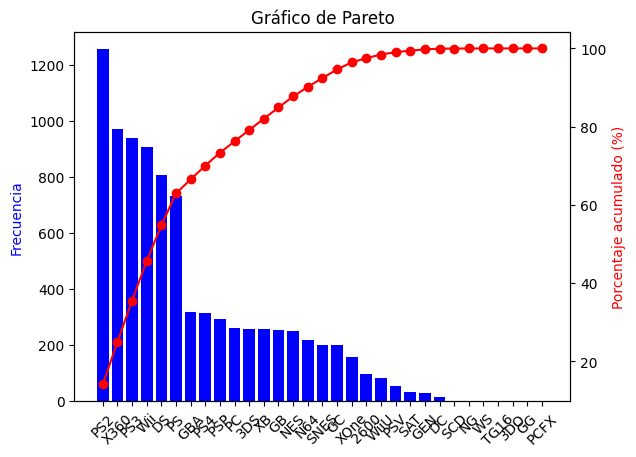

   index platform  ventas_totales
0     16      PS2         1255.77
1     28     X360          971.42
2     17      PS3          939.65
3     26      Wii          907.51
4      4       DS          806.12
5     15       PS          730.86


In [15]:
def diagrama_pareto(data,frecuencia, categoria):
    # Ordenar data
    
    data = data.sort_values(by=frecuencia, ascending=False).reset_index()
    data= data.dropna()
    top6 = data.iloc[0:6]
    display(data)

    # Calcular la contribución acumulativo
    total = sum(data[frecuencia])
    porcentajes = [(frecuencia / total) * 100 for frecuencia in data[frecuencia]]
    porcentajes_acumulativos = [sum(porcentajes[:i+1]) for i in range(len(porcentajes))]
    # Crear el gráfico de Pareto
    fig, ax1 = plt.subplots()
    # Gráfico de barras
    ax1.bar(data[categoria], data[frecuencia], color='b')
    ax1.set_ylabel('Frecuencia', color='b')
    # Crear el eje secundario para la línea acumulativa
    ax2 = ax1.twinx()
    ax2.plot(data[categoria], porcentajes_acumulativos,
             color='r', marker='o', linestyle='-')
    ax2.set_ylabel('Porcentaje acumulado (%)', color='r')
    # Etiquetas y título
    plt.title('Gráfico de Pareto')
    ax1.set_xticklabels(data[categoria], rotation=45)
    plt.xticks(data[categoria])  # Ajustar las etiquetas del eje x
    # Mostrar el gráfico
    plt.show()
    return top6


top6 = diagrama_pareto(ventas_plataforma, "ventas_totales", "platform")
print(top6)

Más del 60% de las ventas fueron a través del top 6 de plataformas.

Se elige el top 6 de plataformas para observar su comportamiento en ventas a lo largo de los años

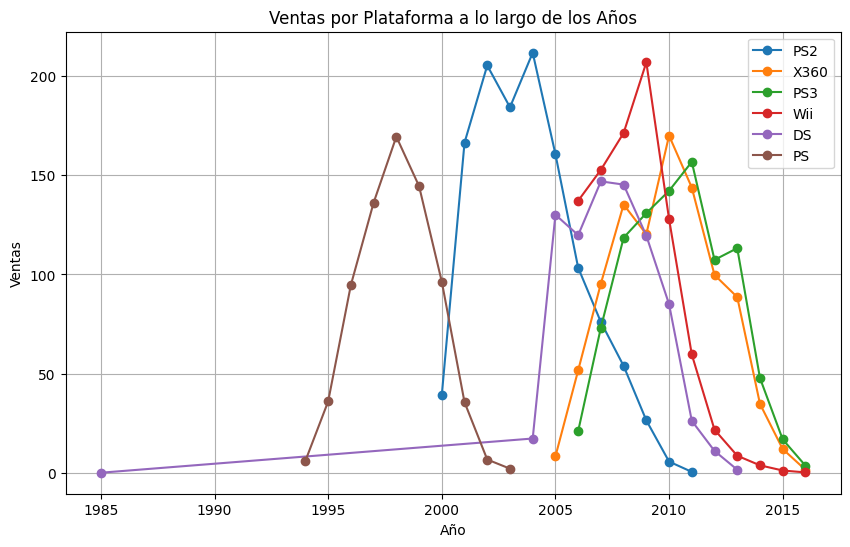

In [16]:

# Filtrar el DataFrame por plataforma y agrupar por año
plataformas = top6["platform"]
data = data[~ (data["year_of_release"] == 0)]


plt.figure(figsize=(10, 6))

# Iterar sobre cada plataforma y trazar una línea para sus ventas a lo largo de los años
for plataforma in plataformas:
    data_plataforma = data[data['platform'] == plataforma]
    ventas = data_plataforma.groupby('year_of_release')['ventas_totales'].sum()
    plt.plot(ventas.index, ventas.values, marker='o', label=plataforma)

# Personalizar el gráfico
plt.title('Ventas por Plataforma a lo largo de los Años')
plt.xlabel('Año')
plt.ylabel('Ventas')
plt.grid(True)
plt.legend()
plt.show()

Las plataformas tardar alrededor de 10 años para desaparecer, la plataforma que más duro fue DS.
Aparece una plataforma nueva entre 1 a 5 años.
Todas las plataformas en un inicio ascienden hasta su punto máximo y luego empiezan a descender hasta desaparecer.

- Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.

El periodo que se tomará será 2011 - 2016, ya que es importante tomar la data más actualizada y en ese periodo se podrá ver si las ventas de las plataformas están subiendo o bajando.


- Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.

In [17]:
data2= data[data["year_of_release"]>=2011]

- ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

,index,platform,ventas_totales
0,4,PS3,445.57
1,10,X360,380.38
2,5,PS4,314.14
3,0,3DS,257.81
4,11,XOne,159.32
5,2,PC,97.68
6,8,Wii,95.02
7,9,WiiU,82.19
8,7,PSV,53.81
9,1,DS,38.73


C:\Users\LUCIA\AppData\Local\Temp\ipykernel_2052\3874426141.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(data[categoria], rotation=45)


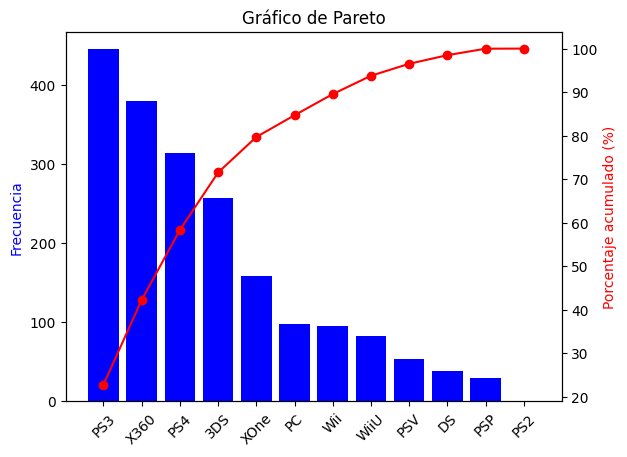

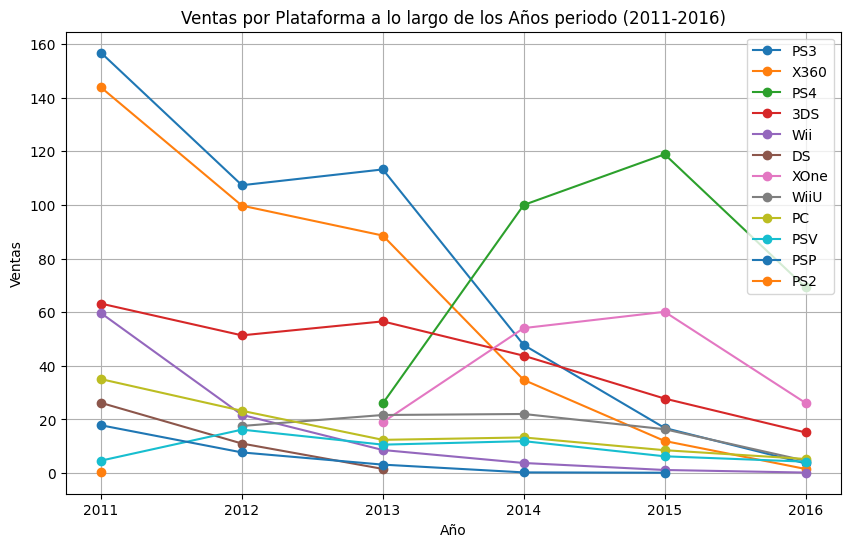

In [18]:
plataformas= data2["platform"].unique()
ventas_plataforma = data2.groupby(by="platform")["ventas_totales"].sum().reset_index()
top6 = diagrama_pareto(ventas_plataforma, "ventas_totales", "platform")

plt.figure(figsize=(10, 6))

# Iterar sobre cada plataforma y trazar una línea para sus ventas a lo largo de los años
for plataforma in plataformas:
    data_plataforma = data2[data2['platform'] == plataforma]
    ventas = data_plataforma.groupby('year_of_release')['ventas_totales'].sum()
    plt.plot(ventas.index, ventas.values, marker='o', label=plataforma)

# Personalizar el gráfico
plt.title('Ventas por Plataforma a lo largo de los Años periodo (2011-2016)')
plt.xlabel('Año')
plt.ylabel('Ventas')
plt.grid(True)
plt.legend()
plt.show()

Las plataformas con más ventas son PS3, X360, PS4 y 3DS, además las plataformas que se ven más prometedoras son PS4 XONE y 3DS y plataformas nuevas que puedan lanzarse.

- Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

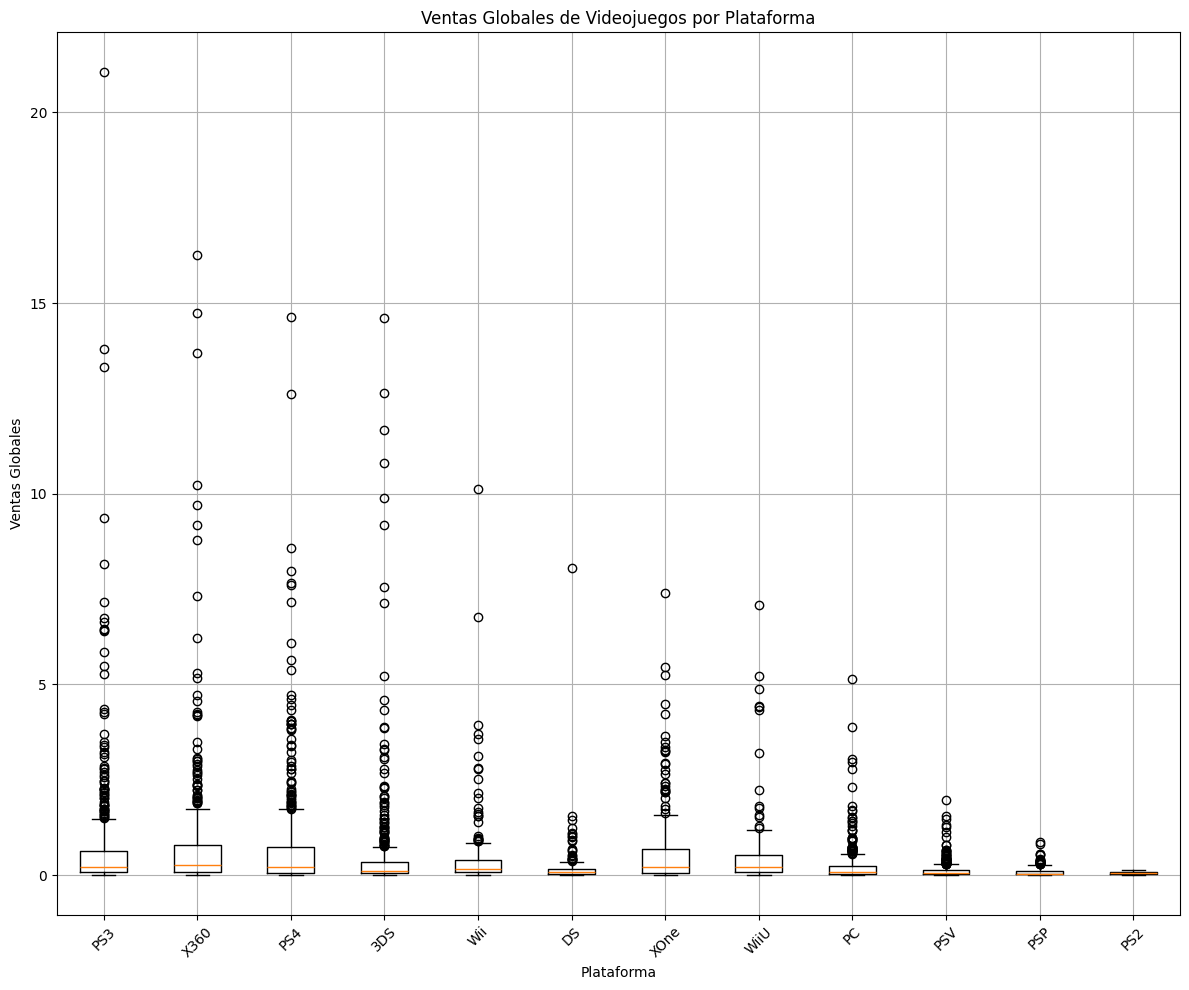

In [19]:
resumen_ventas_totales = data2.groupby(["platform","name"])["ventas_totales"].sum().reset_index()

ventas_por_plataforma = [resumen_ventas_totales[resumen_ventas_totales["platform"]
                                                == plataforma]["ventas_totales"] for plataforma in plataformas]
plt.figure(figsize=(12, 10))  # Tamaño del gráfico (opcional)
plt.boxplot(ventas_por_plataforma, labels=plataformas)
# Añadir etiquetas y título
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales')
plt.title('Ventas Globales de Videojuegos por Plataforma')

# Rotar etiquetas del eje x para mayor claridad
plt.xticks(rotation=45)
# Mostrar el gráfico
plt.grid(True)  # Mostrar cuadrícula
plt.tight_layout()  # Ajustar diseño
plt.show()

El promedio de las ventas de los juegos están por encima de la mediana, hay muchos valores superiores.
Las ventas más significativas son en las plataformas PS3 X360 PS4 XONE, y las más bajas DS Y PS2

- Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.

In [20]:
# Gráfico de dispersión user_score vrs ventas_totales

print(data2["user_score"].unique())

['8.2' '8.1' '3.4' nan '5.3' '4.8' '3.2' '8.3' '8.4' '2.6' '7.8' '7.2' '7'
 '8.7' '4.3' '6.6' '5.7' '5' '7.4' '7.5' '6.5' '9.1' '7.3' '6.9' '6.4'
 '6.1' '8.6' '7.9' '6.7' '5.4' '4' '8.5' '9' '4.9' '4.5' '6.2' '4.2' '6.3'
 '7.7' '9.2' '7.6' '8' '3.7' '4.1' '5.8' '5.6' '6.8' '5.5' '4.4' '5.9'
 '8.9' '3.9' 'tbd' '3.1' '2.9' '6' '4.7' '7.1' '8.8' '5.1' '3.5' '2.5' '3'
 '2.7' '2.2' '5.2' '1.8' '3.8' '3.3' '4.6' '9.3' '1.6' '3.6' '2.4' '2.8'
 '1.7' '2.1' '2' '1.5' '0.7' '0.2' '1.2' '0.9' '1.9' '1.3' '1' '1.4' '2.3']


['8.2' '8.1' '3.4' nan '5.3' '4.8' '3.2' '8.3' '8.4' '2.6' '7.8' '7.2' '7'
 '8.7' '4.3' '6.6' '5.7' '5' '7.4' '7.5' '6.5' '9.1' '7.3' '6.9' '6.4'
 '6.1' '8.6' '7.9' '6.7' '5.4' '4' '8.5' '9' '4.9' '4.5' '6.2' '4.2' '6.3'
 '7.7' '9.2' '7.6' '8' '3.7' '4.1' '5.8' '5.6' '6.8' '5.5' '4.4' '5.9'
 '8.9' '3.9' 'tbd' '3.1' '2.9' '6' '4.7' '7.1' '8.8' '5.1' '3.5' '2.5' '3'
 '2.7' '2.2' '5.2' '1.8' '3.8' '3.3' '4.6' '9.3' '1.6' '3.6' '2.4' '2.8'
 '1.7' '2.1' '2' '1.5' '0.7' '0.2' '1.2' '0.9' '1.9' '1.3' '1' '1.4' '2.3']


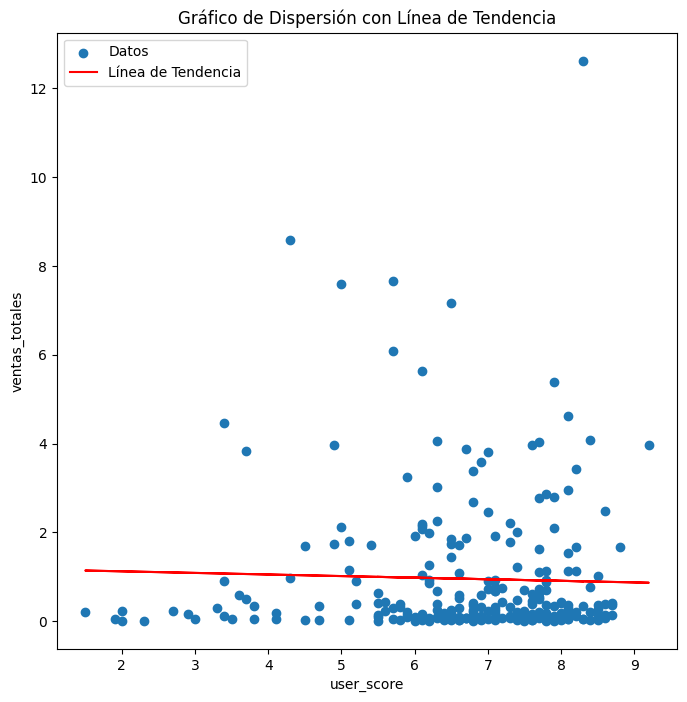

-0.03195711020455643

In [21]:
print(data2["user_score"].unique())

#PS4
data_user = data2[~ data2["user_score"].isnull()]
data_user = data_user[data_user["user_score"] != "tbd"]
data_user["user_score"] = data_user["user_score"].astype(float)

data_ps4 = data_user[data_user["platform"] == "PS4"]



def grafico_dispersión(data,valoracion,ventas):
    # Calcular la línea de tendencia (ajuste lineal)
    x = data[valoracion]
    y = data[ventas]
    # Ajuste lineal usando polyfit de numpy
    m, b = np.polyfit(x, y, 1)
    # Crea el gráfico de dispersión
    plt.figure(figsize=(8, 8))  # Ancho x Alto en pulgadas
    plt.scatter(x, y, label='Datos')# Grafica la línea de tendencia
    plt.plot(x, m*x + b, color='red', label='Línea de Tendencia')
    plt.xlabel(valoracion)
    plt.ylabel(ventas)
    plt.title('Gráfico de Dispersión con Línea de Tendencia')
    # Agrega una leyenda
    plt.legend()
    plt.show()
    correlation = data[valoracion].corr(data[ventas])
    return correlation


grafico_dispersión(data_ps4,"user_score","ventas_totales")

Correlación negativa baja, la valoración de usuario no es directamente proporcional con las ventas de PS4.

[97. 82. 83. 85. 87. 76. 93. 86. 77. 88. 80. 92. 70. 78. 84. 73. 81. 90.
 74. 71. 89. 79. 68. 75. 63. 54. 61. 62. 69. 67. 65. 72. 60. 48. 66. 59.
 57. nan 43. 47. 32. 53. 58. 38. 45. 19. 44. 64. 42. 25. 52. 31. 55. 49.
 51.]


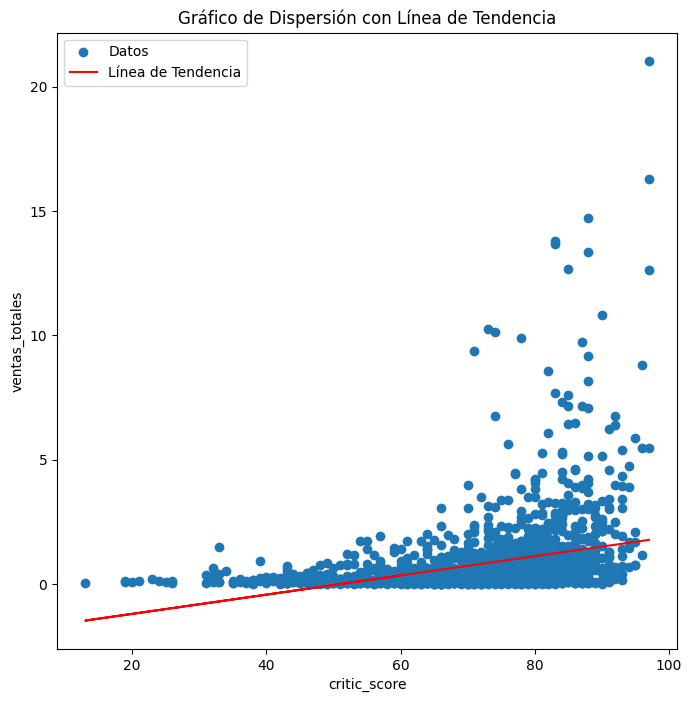

0.32997650501145837

In [22]:
# Gráfico de dispersión critic_score vrs ventas_totales
print(data_ps4["critic_score"].unique())
data_critic = data2[~data2["critic_score"].isnull()]
data_ps4 = data_critic[data_critic["platform"] == "PS4"]
grafico_dispersión(data_critic, "critic_score", "ventas_totales")

Correlación positiva, la valoración de un profesional es directamente proporcional con las ventas de PS4.

- Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.

,index,platform,ventas_totales
0,4,PS4,244.49
1,10,XOne,102.99
2,3,PS3,98.26
3,9,X360,84.95
4,2,PC,17.63
5,7,Wii,11.17
6,8,WiiU,9.34
7,6,PSV,6.63
8,0,3DS,5.34
9,1,DS,0.38


C:\Users\LUCIA\AppData\Local\Temp\ipykernel_2052\3874426141.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(data[categoria], rotation=45)


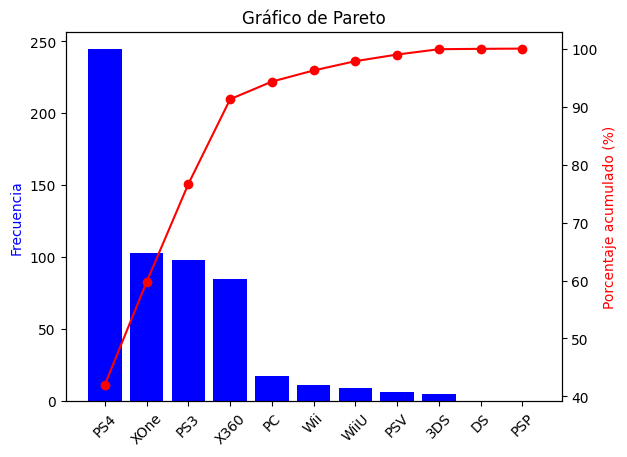

In [23]:
games = data_ps4["name"].unique()
data_games = data2[data2["name"].isin(games)]
ventas_plataforma = data_games.groupby(
    by="platform")["ventas_totales"].sum().reset_index()
top6 = diagrama_pareto(ventas_plataforma, "ventas_totales", "platform")

Los mismos juegos en otras plataformas tienen ventas menores a la plataforma PS4.

- Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

,index,genre,ventas_totales
0,0,Action,557.80
1,8,Shooter,402.91
2,7,Role-Playing,245.63
3,10,Sports,237.15
4,3,Misc,139.42
5,4,Platform,88.68
6,6,Racing,88.31
7,2,Fighting,66.90
8,9,Simulation,50.26
9,1,Adventure,45.04


C:\Users\LUCIA\AppData\Local\Temp\ipykernel_2052\3874426141.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(data[categoria], rotation=45)


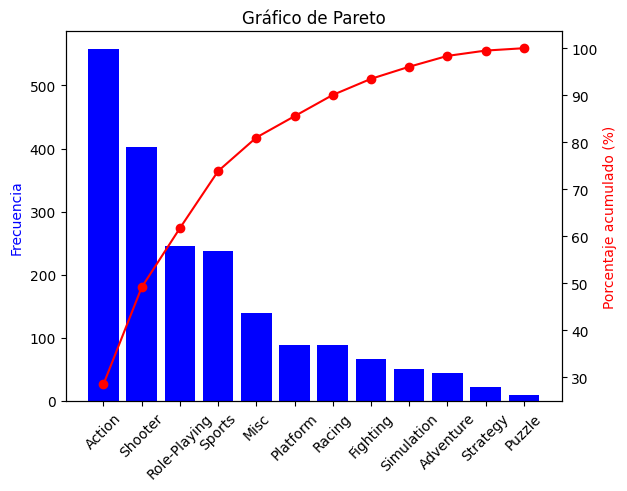

In [24]:
ventas_genero = data2.groupby(
    by="genre")["ventas_totales"].sum().reset_index()
top6 = diagrama_pareto(ventas_genero, "ventas_totales", "genre")

Los géneros con más ventas son Action, Shooter, y Sports, representan más del 80% de las ventas del periodo 2011-2016.
Los géneros con menos ventas con Puzzle, simulation , strategy,adventure.

# 4. Perfil de usuario para cada región

- Para cada región (NA, UE, JP) determina:
Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.

Las cinco plataformas principales NA

,index,platform,na_sales
0,10,X360,226.80
1,4,PS3,168.26
2,5,PS4,108.74
3,11,XOne,93.12
4,0,3DS,82.65
5,8,Wii,48.56
6,9,WiiU,38.10
7,2,PC,29.88
8,1,DS,18.86
9,7,PSV,12.47


C:\Users\LUCIA\AppData\Local\Temp\ipykernel_2052\3874426141.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(data[categoria], rotation=45)


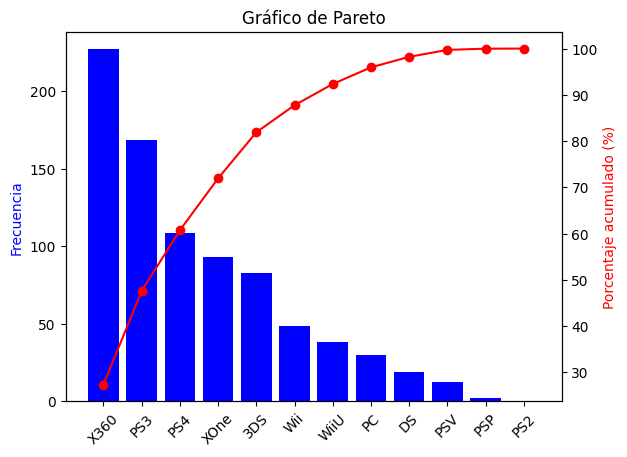

In [25]:
data_na = data2.groupby("platform")["na_sales"].sum().reset_index()
top6 = diagrama_pareto(data_na, "na_sales", "platform")



Las cinco plataformas principales eu

,index,platform,eu_sales
0,4,PS3,163.10
1,5,PS4,141.09
2,10,X360,117.10
3,0,3DS,61.27
4,2,PC,56.70
5,11,XOne,51.59
6,8,Wii,29.60
7,9,WiiU,25.13
8,7,PSV,13.07
9,1,DS,9.24


C:\Users\LUCIA\AppData\Local\Temp\ipykernel_2052\3874426141.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(data[categoria], rotation=45)


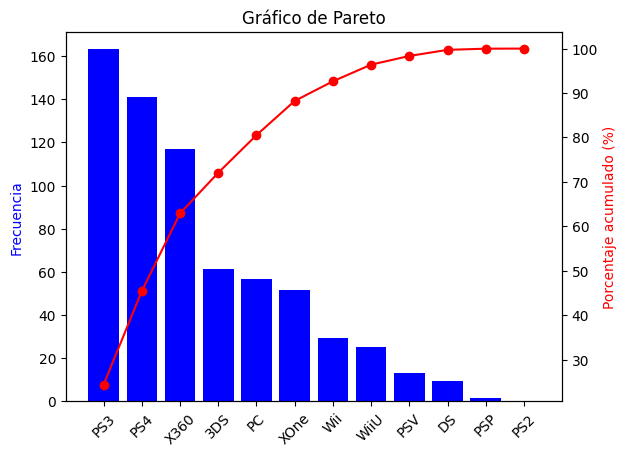

In [26]:
data_eu = data2.groupby("platform")["eu_sales"].sum().reset_index()
top6 = diagrama_pareto(data_eu, "eu_sales", "platform")

Las cinco plataformas principales jp

,index,platform,jp_sales
0,0,3DS,100.62
1,4,PS3,49.39
2,6,PSP,24.04
3,7,PSV,21.84
4,5,PS4,15.96
5,9,WiiU,13.01
6,8,Wii,8.97
7,1,DS,8.04
8,10,X360,3.35
9,11,XOne,0.34


C:\Users\LUCIA\AppData\Local\Temp\ipykernel_2052\3874426141.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(data[categoria], rotation=45)


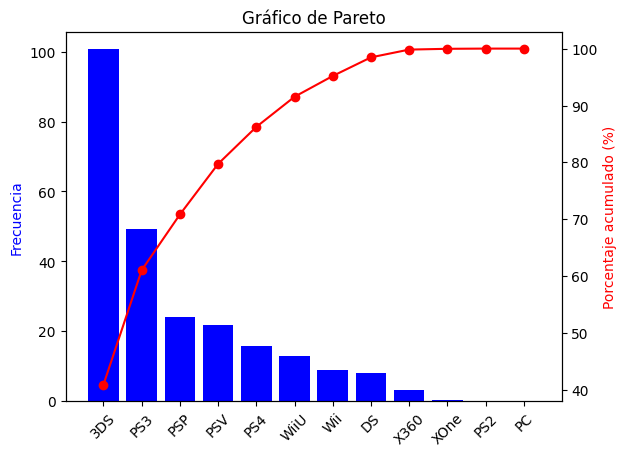

In [27]:
data_jp = data2.groupby("platform")["jp_sales"].sum().reset_index()
top6 = diagrama_pareto(data_jp, "jp_sales", "platform")

X360, PS3 , PS4, Xone, 3DS son las plataformas top 5 que representas el 80% de las ventas en Na.
X360, PS3 , PS4, PC , 3DS son las plataformas top 5 que representas el 80% de las ventas en eu.
3DS PS3 PSP PSV PS4 Son las plataformas top 5 que representan más del 80% de las ventas en jp.

Las plataformas en común PS3, PS4 y 3DS.

- Los cinco géneros principales. Explica la diferencia.

Los cinco géneros principales  na

,index,genre,na_sales
0,0,Action,230.92
1,8,Shooter,194.43
2,10,Sports,108.70
3,7,Role-Playing,83.78
4,3,Misc,69.69
5,4,Platform,38.28
6,6,Racing,31.98
7,2,Fighting,31.63
8,9,Simulation,15.37
9,1,Adventure,14.76


C:\Users\LUCIA\AppData\Local\Temp\ipykernel_2052\3874426141.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(data[categoria], rotation=45)


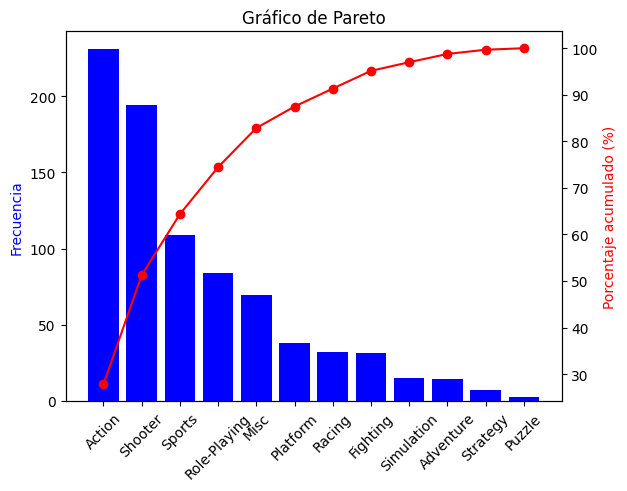

In [28]:
data_na = data2.groupby("genre")["na_sales"].sum().reset_index()
top6 = diagrama_pareto(data_na, "na_sales", "genre")

Los cinco géneros principales  eu

,index,genre,eu_sales
0,0,Action,199.12
1,8,Shooter,148.02
2,10,Sports,88.48
3,7,Role-Playing,62.30
4,6,Racing,40.58
5,3,Misc,39.72
6,4,Platform,30.07
7,9,Simulation,19.72
8,2,Fighting,16.24
9,1,Adventure,13.96


C:\Users\LUCIA\AppData\Local\Temp\ipykernel_2052\3874426141.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(data[categoria], rotation=45)


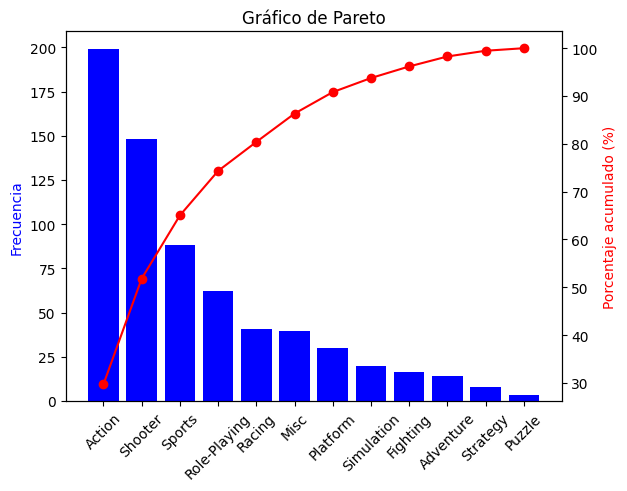

In [29]:
data_eu = data2.groupby("genre")["eu_sales"].sum().reset_index()
top6 = diagrama_pareto(data_eu, "eu_sales", "genre")

Los cinco géneros principales  jp

,index,genre,jp_sales
0,7,Role-Playing,79.87
1,0,Action,63.62
2,3,Misc,17.60
3,2,Fighting,12.38
4,4,Platform,12.13
5,1,Adventure,12.07
6,8,Shooter,11.92
7,9,Simulation,11.64
8,10,Sports,11.09
9,6,Racing,5.64


C:\Users\LUCIA\AppData\Local\Temp\ipykernel_2052\3874426141.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(data[categoria], rotation=45)


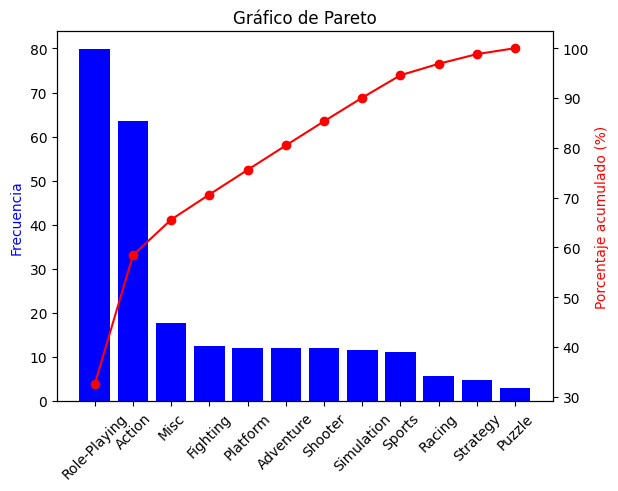

In [30]:
data_jp = data2.groupby("genre")["jp_sales"].sum().reset_index()
top6 = diagrama_pareto(data_jp, "jp_sales", "genre")

Action, shooter, sport, role playing y misc representan màs del 80% de las ventas en na.
Action, shooter, sport, role playing y racin representan casi el 80% de las ventas en eu.
Role-playing, action, misc, fighting, y platform representan alrededor del 75% de las ventas en jp.

El género Action es uno de los géneros más representativos en las tres regiones.
Los gustos por los géneros en na y eu son similares y claramente diferentes en jp

- Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

clasificaciones de ESRB en  las ventas na

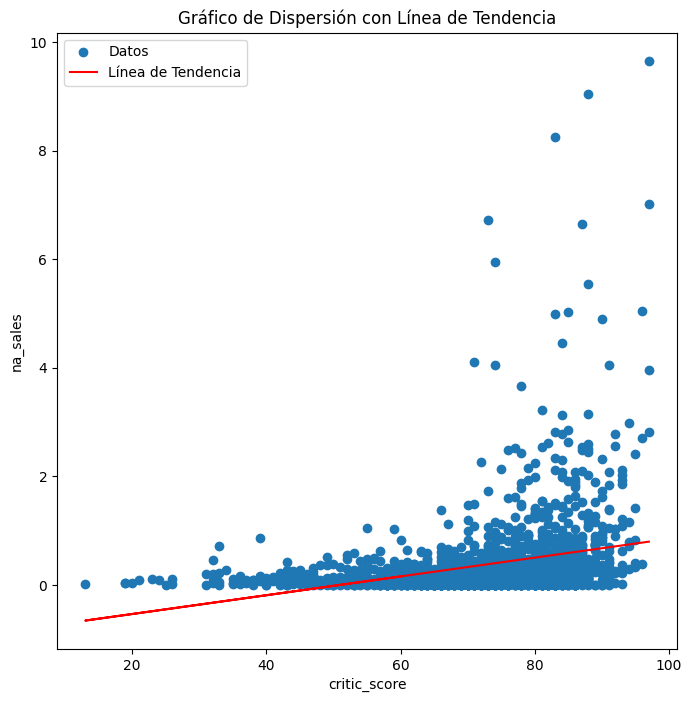

0.3081133286943528

In [31]:
#critic_score

grafico_dispersión(data_critic, "critic_score", "na_sales")

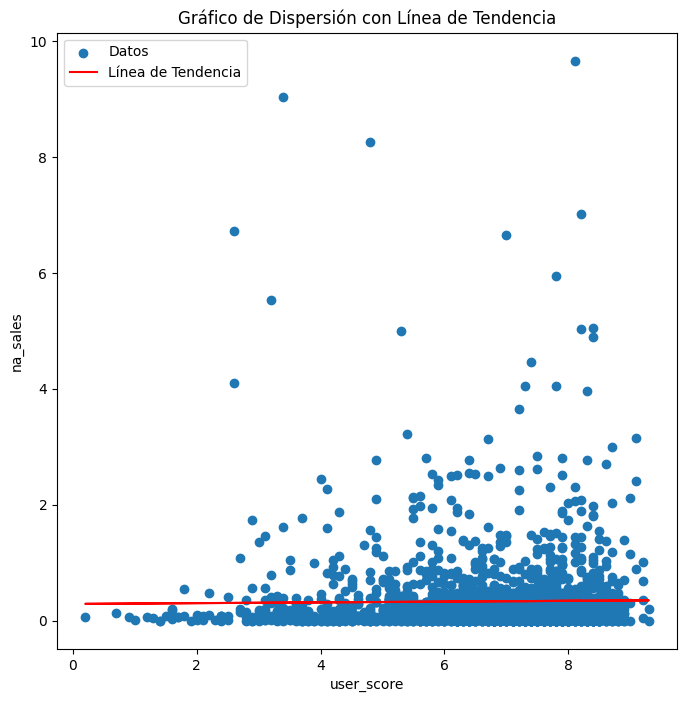

0.014490446159149028

In [32]:
# user_score

grafico_dispersión(data_user, "user_score", "na_sales")

clasificaciones de ESRB en  las ventas eu

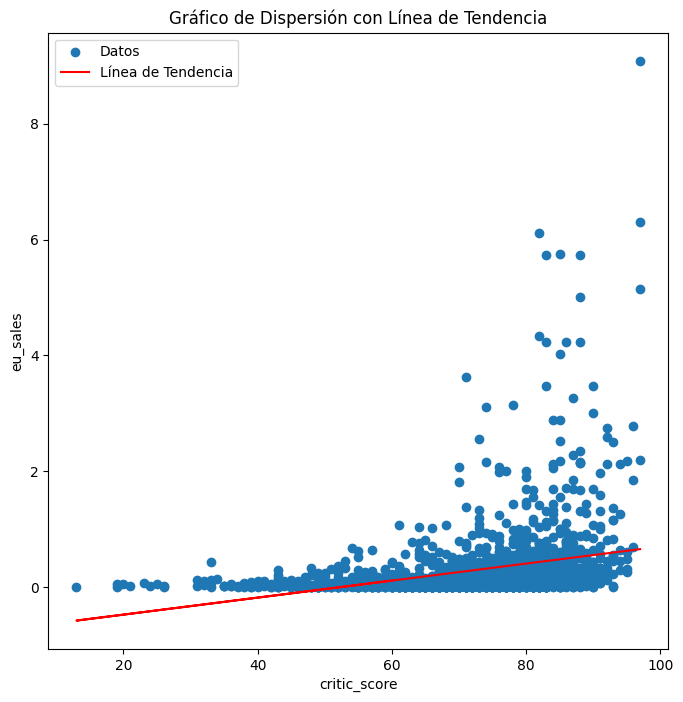

0.3100981570582302

In [33]:
# critic_score

grafico_dispersión(data_critic, "critic_score", "eu_sales")

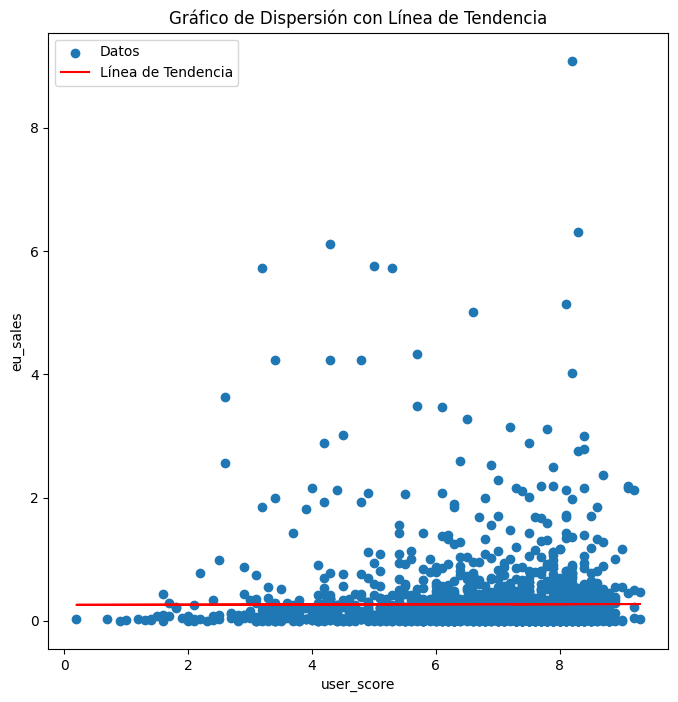

0.0037266805768683526

In [34]:
# user_score

grafico_dispersión(data_user, "user_score", "eu_sales")

clasificaciones de ESRB en  las ventas jp

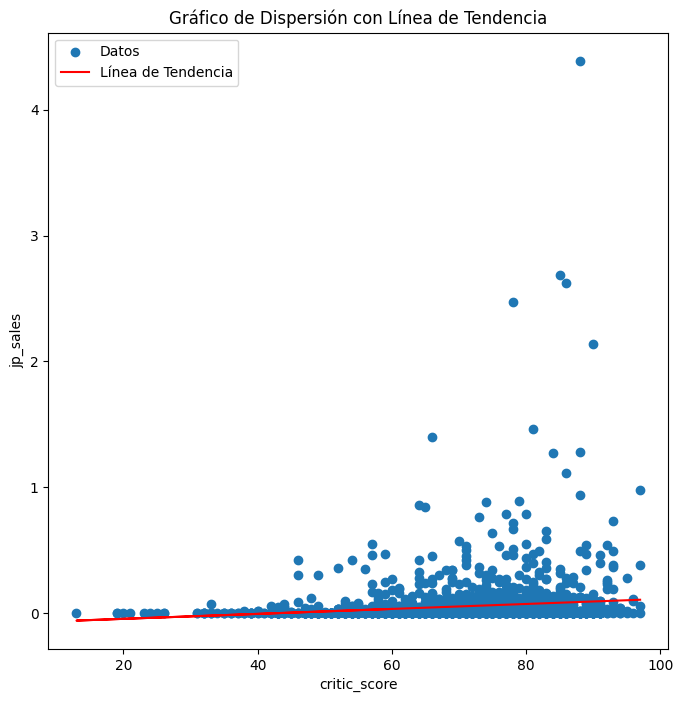

0.12945181525104407

In [35]:
# critic_score

grafico_dispersión(data_critic, "critic_score", "jp_sales")

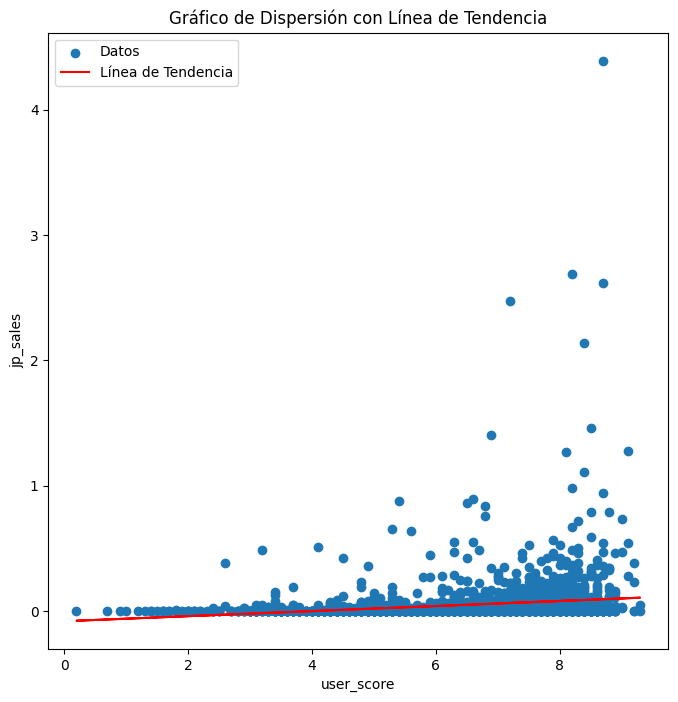

0.16413303679530386

In [36]:
# user_score

grafico_dispersión(data_user, "user_score", "jp_sales")

Se comprueba una correlación positiva en la valoración de profesionales en las regiones na y eu, una correlación positiva menor en jp.

Se comprueba una correlación positiva muy baja en la valoración de usuarios en na y eu, y ligeramente mayor en jp.

 # 5. Prueba de hipótesis:

- Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

Se revisa si las distribuciones son normales, se calcula media y varianza.

In [37]:
data_xbox = data_user[data_user["platform"] == "XOne"]["user_score"]
data_PC = data_user[data_user["platform"] == "PC"]["user_score"]

# calculando la media para la plataforma Xbox One

media_xbox = np.mean(data_xbox)  
var_xbox = np.var(data_xbox)

# calculando la media para la plataforma PC

media_PC = np.mean(data_PC)
var_PC = np.var(data_PC)

print(f"La media de valoración de usuarios de la plataforma Xbox One es de {
      media_xbox} y la varianza es {var_xbox}")
print(f"La media de valoración de usuarios de la plataforma PC es de {
      media_PC} y la varianza es {var_PC}")

La media de valoración de usuarios de la plataforma Xbox One es de 6.521428571428572 y la varianza es 1.8965188383045526
La media de valoración de usuarios de la plataforma PC es de 6.451791530944625 y la varianza es 2.5878388099608483


(array([ 2.,  5.,  1., 11., 10., 35., 41., 36., 34.,  7.]),
 array([1.6 , 2.36, 3.12, 3.88, 4.64, 5.4 , 6.16, 6.92, 7.68, 8.44, 9.2 ]),
 <BarContainer object of 10 artists>)

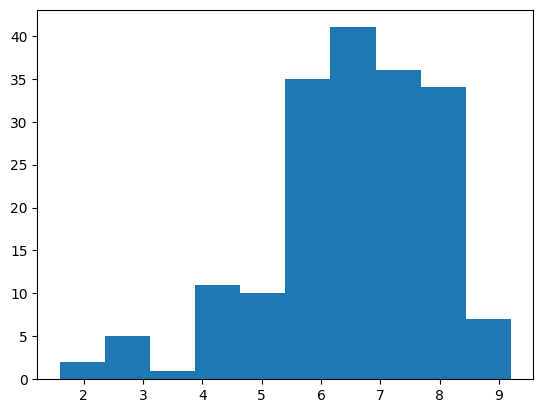

In [38]:
# Gráfico de dispersión

plt.hist(data_xbox)

(array([ 3.,  5., 17., 20., 21., 49., 52., 69., 60., 11.]),
 array([1.4 , 2.19, 2.98, 3.77, 4.56, 5.35, 6.14, 6.93, 7.72, 8.51, 9.3 ]),
 <BarContainer object of 10 artists>)

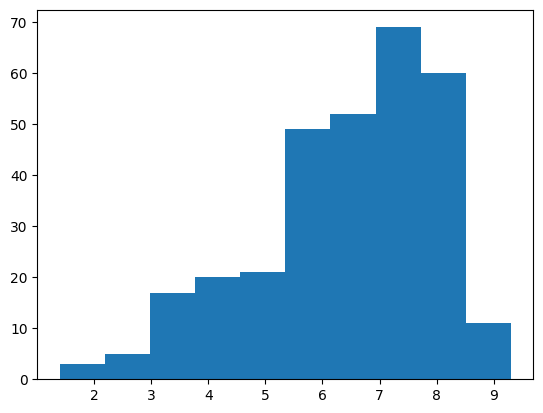

In [39]:
plt.hist(data_PC)

H0: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son iguales

H1: m xbox <> m Pc


In [40]:
alpha = 0.05

results = st.ttest_ind(
    data_xbox, data_PC, equal_var=False)
print('valor p:', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p: 0.6130712247638477
No podemos rechazar la hipótesis nula


No hay suficiente evidencia para rechazar la hipótesis nula en ese momento

- Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Se revisa si las distribuciones son normales, se calcula media y varianza.

In [41]:
data_act = data_user[data_user["genre"] == "Action"]["user_score"]
data_spo = data_user[data_user["genre"] == "Sports"]["user_score"]

# calculando la media para la plataforma Xbox One

media_act = np.mean(data_act)
var_act = np.var(data_act)

# calculando la media para la plataforma PC

media_spo = np.mean(data_spo)
var_spo = np.var(data_spo)

print(f"La media de valoración de usuarios de la plataforma Xbox One es de {
      media_act} y la varianza es {var_act}")
print(f"La media de valoración de usuarios de la plataforma PC es de {
      media_spo} y la varianza es {var_spo}")

La media de valoración de usuarios de la plataforma Xbox One es de 6.775903614457831 y la varianza es 1.8091482798664535
La media de valoración de usuarios de la plataforma PC es de 5.650813008130081 y la varianza es 2.87079202194461


H0: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales

H1: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes


In [42]:
alpha = 0.05

results = st.ttest_ind(
    data_act, data_spo, equal_var=False)
print('valor p:', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p: 8.285648549432565e-19
Rechazamos la hipótesis nula


Se concluye que hay evidencia para afirmar que las medias son diferentes.

# 6. Conclusión general


El objetivo del proyecto fue analizar el comportamiento de los clientes y encontrar patrones de consumo.
De la muestra se pudo observar lo siguiente:
El número de juegos lanzados desde 1995 hasta alrededor del 2008 fue aumentando, y empezó a decrecer alrededor del 2009 hasta el 2016. La cantidad de juegos por año fue entre 200 a más de 1400 juegos.
Más del 60% de las ventas fueron a través del top 6 de plataformas : PS2, X360, PS3, Wii, DS y PS.
Las plataformas tardar alrededor de 10 años para desaparecer, la plataforma que más duro fue DS.
Aparece una plataforma nueva entre 1 a 5 años.
Todas las plataformas en un inicio ascienden hasta su punto màximo y luego empiezan a descender hasta desaparecer.
Las plataformas con más ventas son PS3, X360, PS4 y 3DS, además las plataformas que se ven más prometedoras son PS4 XONE y 3DS y plataformas nuevas que puedan lanzarse, del periodo 2011-2016.
El promedio de las ventas de los juegos están por encima de la mediana, hay muchos valores superiores.
Las ventas más significativas son en las plataformas PS3 X360 PS4 XONE, y las más bajas DS Y PS2.
Los géneros con más ventas son Action, Shooter, y Sports, representan más del 80% de las ventas del periodo 2011-2016.
Los géneros con menos ventas con Puzzle, simulation , strategy,adventure.
X360, PS3 , PS4, Xone, 3DS son las plataformas top 5 que representas el 80% de las ventas en Na.
X360, PS3 , PS4, PC , 3DS son las plataformas top 5 que representas el 80% de las ventas en eu.
3DS PS3 PSP PSV PS4 Son las plataformas top 5 que representan más del 80% de las ventas en jp.
Las plataformas en común PS3, PS4 y 3DS.
Action, shooter, sport, role playing y misc representan más del 80% de las ventas en na.
Action, shooter, sport, role playing y racin representan casi el 80% de las ventas en eu.
Role-playing, action, misc, fighting, y platform representan alrededor del 75% de las ventas en jp.

El género Action es uno de los géneros más representativos en las tres regiones.
Los gustos por los géneros en na y eu son similares y claramente diferentes en jp.

Se comprueba una correlación positiva en la valoración de profesionales en las regiones na y eu, una correlación positiva menor en jp.

Se comprueba una correlación positiva muy baja en la valoración de usuarios en na y eu, y ligeramente mayor en jp.

Se eliminó duplicados, se mantuvo la data de ventas con información faltante del año, para revisar las ventas por plataforma.
Respecto a user_score y critic_score se manejo la data por separado para la eliminación de valores nulos para no afectar la data entre ellos al eliminar información.

Através del análisis se pudo reconocer géneros y plataformas con mayores ventas, así como plataformas en prometedoras para el siguiente año. Se evidenció diferencia entre el comportamiento de las regiones y el impacto del critic_store en cada región.

Finalmente se realizó prueba de hipótesis donde se pudo afirmar que las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.